# Communicate Bike-Sharing Analysis for (Ford GoBike Data)
## by Arijeet Biswas


## Introduction
Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company. 

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

## Preliminary Wrangling

It's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in from 2017 to April, 2019.

Ford GoBike Data: https://s3.amazonaws.com/fordgobike-data/index.html

## Gathering

In [29]:
# import all packages and set plots to be embedded inline
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import math
import calendar
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

In [30]:
import seaborn as sb

In [31]:
import os

In [32]:
import glob

In [33]:
pwd

'/Users/arijeet/Fordbiketrip'

In [34]:
path=os.getcwd()

In [35]:
all_files = glob.glob(os.path.join(path, "*.csv"))

In [36]:
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index = True)

In [37]:
df.to_csv('master_file.csv', index=False)

In [38]:
df=pd.read_csv('master_file.csv')

## Assess Data

In [39]:
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,1035,No,598,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.1870,1988.0,Male,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-02-28 23:59:47.0970,Subscriber
1,1673,No,943,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.9740,1987.0,Male,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-02-28 23:21:16.4950,Customer
2,3498,No,18587,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.9250,1986.0,Female,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:55.1900,Customer
3,3129,No,18558,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.4500,1981.0,Male,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:53.6210,Customer
4,1839,Yes,885,297.0,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.6080,1976.0,Female,308.0,37.336802,-121.894090,San Pedro Square,2018-02-28 23:15:12.8580,Subscriber


In [40]:
df.duplicated().sum()

0

In [41]:
df.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,3.254325e+06,3.254325e+06,3.241824e+06,3.254325e+06,3.254325e+06,3.036159e+06,3.241824e+06,3.254325e+06,3.254325e+06
mean,2.729018e+03,8.743223e+02,1.191966e+02,3.776874e+01,-1.223519e+02,1.983137e+03,1.209191e+02,3.776880e+01,-1.223530e+02
std,1.724443e+03,2.468547e+03,1.029334e+02,1.342571e-01,3.220803e-01,1.043760e+01,1.030184e+02,1.029275e-01,1.601559e-01
min,1.000000e+01,6.100000e+01,3.000000e+00,0.000000e+00,-1.224737e+02,1.878000e+03,3.000000e+00,0.000000e+00,-1.224737e+02
25%,1.336000e+03,3.510000e+02,3.000000e+01,3.777143e+01,-1.224108e+02,1.978000e+03,3.100000e+01,3.777106e+01,-1.224117e+02
50%,2.579000e+03,5.570000e+02,8.700000e+01,3.778127e+01,-1.223974e+02,1.985000e+03,8.800000e+01,3.778107e+01,-1.223983e+02
75%,3.821000e+03,8.730000e+02,1.860000e+02,3.779625e+01,-1.222935e+02,1.991000e+03,1.880000e+02,3.779539e+01,-1.222934e+02
max,7.108000e+03,8.636900e+04,4.200000e+02,4.551000e+01,0.000000e+00,2.001000e+03,4.200000e+02,4.551000e+01,0.000000e+00


In [42]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254325 entries, 0 to 3254324
Data columns (total 16 columns):
bike_id                    3254325 non-null int64
bike_share_for_all_trip    2734625 non-null object
duration_sec               3254325 non-null int64
end_station_id             3241824 non-null float64
end_station_latitude       3254325 non-null float64
end_station_longitude      3254325 non-null float64
end_station_name           3241824 non-null object
end_time                   3254325 non-null object
member_birth_year          3036159 non-null float64
member_gender              3036592 non-null object
start_station_id           3241824 non-null float64
start_station_latitude     3254325 non-null float64
start_station_longitude    3254325 non-null float64
start_station_name         3241824 non-null object
start_time                 3254325 non-null object
user_type                  3254325 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 397.3+ MB


In [43]:
df.sample(50)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
2271585,2174,No,322,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-07-26 08:38:20.6480,1982.0,Male,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-07-26 08:32:58.2920,Subscriber
2417979,1414,No,1190,241.0,37.852477,-122.270213,Ashby BART Station,2018-07-03 21:46:03.2760,1958.0,Female,269.0,37.862320,-122.258801,Telegraph Ave at Carleton St,2018-07-03 21:26:13.0500,Subscriber
545379,2720,No,209,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-09-20 15:32:18.1210,NaN,NaN,90.0,37.771058,-122.402717,Townsend St at 7th St,2018-09-20 15:28:48.6550,Subscriber
2780555,2084,No,588,3.0,37.786375,-122.404904,Powell St BART Station (Market St at 4th St),2018-10-08 09:36:20.8370,1992.0,Male,85.0,37.770083,-122.429156,Church St at Duboce Ave,2018-10-08 09:26:32.5540,Subscriber
2514111,3455,No,407,11.0,37.797280,-122.398436,Davis St at Jackson St,2018-08-19 10:56:00.2730,1990.0,Male,9.0,37.798572,-122.400869,Broadway at Battery St,2018-08-19 10:49:12.2900,Customer
504034,2132,No,2510,314.0,37.333988,-121.894902,Santa Clara St at Almaden Blvd,2018-09-26 21:18:08.0670,NaN,NaN,310.0,37.335885,-121.885660,San Fernando St at 4th St,2018-09-26 20:36:17.5930,Customer
1636627,2891,No,591,364.0,37.772000,-122.389970,China Basin St at 3rd St,2019-03-01 08:48:53.5010,1974.0,Male,22.0,37.789756,-122.394643,Howard St at Beale St,2019-03-01 08:39:01.5550,Subscriber
2498249,4383,No,778,356.0,37.769188,-122.422285,Valencia St at Clinton Park,2018-08-21 19:15:12.5330,1986.0,Male,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2018-08-21 19:02:14.1470,Subscriber
2617146,569,No,448,178.0,37.819381,-122.261928,Broadway at 30th St,2018-08-02 10:37:09.5980,1985.0,Male,198.0,37.807813,-122.264496,Snow Park,2018-08-02 10:29:41.0670,Subscriber
2283468,4214,No,984,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-07-24 17:50:19.0100,NaN,NaN,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-07-24 17:33:54.3040,Subscriber


In [44]:
df.shape

(3254325, 16)

In [45]:
# Check age distrubition
df['member_birth_year'].describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .75, .8, .9, .95])

count    3.036159e+06
mean     1.983137e+03
std      1.043760e+01
min      1.878000e+03
10%      1.968000e+03
20%      1.975000e+03
30%      1.980000e+03
40%      1.983000e+03
50%      1.985000e+03
60%      1.988000e+03
70%      1.989000e+03
75%      1.991000e+03
80%      1.992000e+03
90%      1.994000e+03
95%      1.996000e+03
max      2.001000e+03
Name: member_birth_year, dtype: float64

#### Quality issues
###### -user type, gender and bike_share_for_all_trip can be set to category
###### -end_station_id, bike id, start_station_id can be set to object
###### -start time and end time are objects not a timestamps
###### -member birth year has dates prior to 1900
###### -we can calculate the age of the user

#### Tidyness issues
##### -filter users on San Francisco Bay area for better results
##### -generate year, month, hour, minute, weekday fields for date in start_time and end_time


## Cleaning

In [46]:
df_clean=df.copy()

### Quality Issue 1 - improper datatypes
#### Define
Set the data types of fields as mentioned in the Quality issues

#### Code

In [47]:
# set dates to timestamps
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [48]:
# set user type, gender and bike_share_for_all_trip to category
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [49]:
# set bike id, start_station_id, end_station_id to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)

#### Test

In [50]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254325 entries, 0 to 3254324
Data columns (total 16 columns):
bike_id                    3254325 non-null object
bike_share_for_all_trip    2734625 non-null category
duration_sec               3254325 non-null int64
end_station_id             3254325 non-null object
end_station_latitude       3254325 non-null float64
end_station_longitude      3254325 non-null float64
end_station_name           3241824 non-null object
end_time                   3254325 non-null datetime64[ns]
member_birth_year          3036159 non-null float64
member_gender              3036592 non-null category
start_station_id           3254325 non-null object
start_station_latitude     3254325 non-null float64
start_station_longitude    3254325 non-null float64
start_station_name         3241824 non-null object
start_time                 3254325 non-null datetime64[ns]
user_type                  3254325 non-null category
dtypes: category(3), datetime64[ns](2), float

### Quality Issue 2 - Calculate user's age
#### Define
Calculate age of the users

#### Code

In [51]:
# calculate age by substracting the birth year from the current year
df_clean['member_age'] = 2019-df_clean['member_birth_year']

#### Test

In [52]:
df_clean.head(10)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age
0,1035,No,598,1035,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.187,1988.0,Male,1035,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-02-28 23:59:47.097,Subscriber,31.0
1,1673,No,943,1673,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.974,1987.0,Male,1673,37.804770,-122.403234,The Embarcadero at Sansome St,2018-02-28 23:21:16.495,Customer,32.0
2,3498,No,18587,3498,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.925,1986.0,Female,3498,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:55.190,Customer,33.0
3,3129,No,18558,3129,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.450,1981.0,Male,3129,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:53.621,Customer,38.0
4,1839,Yes,885,1839,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.608,1976.0,Female,1839,37.336802,-121.894090,San Pedro Square,2018-02-28 23:15:12.858,Subscriber,43.0
5,2656,No,921,2656,37.350964,-121.902016,Mission St at 1st St,2018-02-28 23:29:40.437,1997.0,Male,2656,37.329732,-121.901782,San Jose Diridon Station,2018-02-28 23:14:19.170,Customer,22.0
6,1616,No,277,1616,37.335885,-121.885660,San Fernando St at 4th St,2018-02-28 23:26:27.222,1957.0,Female,1616,37.330165,-121.885831,San Salvador St at 1st St,2018-02-28 23:21:49.274,Subscriber,62.0
7,144,No,285,144,37.808894,-122.256460,Grand Ave at Perkins St,2018-02-28 23:26:05.405,1990.0,Female,144,37.807813,-122.264496,Snow Park,2018-02-28 23:21:19.631,Subscriber,29.0
8,3351,No,363,3351,37.839649,-122.271756,Genoa St at 55th St,2018-02-28 23:25:22.274,1975.0,Male,3351,37.828410,-122.266315,MacArthur BART Station,2018-02-28 23:19:18.606,Subscriber,44.0
9,1699,Yes,226,1699,37.332039,-121.881766,5th St at San Salvador St,2018-02-28 23:19:06.620,1996.0,Male,1699,37.332794,-121.875926,William St at 10th St,2018-02-28 23:15:20.033,Subscriber,23.0


### Quality 3 - Remove age outliers
#### Define
As said in the Quality issues, there are customers with the birth year before 1900 which means the customers are above 100 years old. As 95% of the users are below 58 , I am removing users above age 60.

#### Code

In [53]:
# Null values are automatically removed by this code
df_clean = df_clean.query('member_age <=60')

In [54]:
# change age and birth year to integer
df_clean.member_age = df_clean.member_age.astype(int)
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

#### Test

In [55]:
df_clean.describe()

,duration_sec,end_station_latitude,end_station_longitude,member_birth_year,start_station_latitude,start_station_longitude,member_age
count,2.959104e+06,2.959104e+06,2.959104e+06,2.959104e+06,2.959104e+06,2.959104e+06,2.959104e+06
mean,7.766713e+02,3.776830e+01,-1.223508e+02,1.983950e+03,3.776840e+01,-1.223521e+02,3.505000e+01
std,2.014392e+03,1.379183e-01,3.360107e-01,9.125958e+00,1.041613e-01,1.643985e-01,9.125958e+00
min,6.100000e+01,0.000000e+00,-1.224737e+02,1.959000e+03,0.000000e+00,-1.224737e+02,1.800000e+01
25%,3.450000e+02,3.777106e+01,-1.224108e+02,1.979000e+03,3.777106e+01,-1.224117e+02,2.800000e+01
50%,5.410000e+02,3.778107e+01,-1.223971e+02,1.986000e+03,3.778107e+01,-1.223974e+02,3.300000e+01
75%,8.360000e+02,3.779539e+01,-1.222914e+02,1.991000e+03,3.779539e+01,-1.222912e+02,4.000000e+01
max,8.628100e+04,4.551000e+01,0.000000e+00,2.001000e+03,4.551000e+01,0.000000e+00,6.000000e+01


In [56]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2959104 entries, 0 to 3254324
Data columns (total 17 columns):
bike_id                    2959104 non-null object
bike_share_for_all_trip    2522282 non-null category
duration_sec               2959104 non-null int64
end_station_id             2959104 non-null object
end_station_latitude       2959104 non-null float64
end_station_longitude      2959104 non-null float64
end_station_name           2946995 non-null object
end_time                   2959104 non-null datetime64[ns]
member_birth_year          2959104 non-null int64
member_gender              2959104 non-null category
start_station_id           2959104 non-null object
start_station_latitude     2959104 non-null float64
start_station_longitude    2959104 non-null float64
start_station_name         2946995 non-null object
start_time                 2959104 non-null datetime64[ns]
user_type                  2959104 non-null category
member_age                 2959104 non-null int

### Tidyness Issue 1 - filter users on San Francisco Bay area for better results

#### Define

Ford GoBike spreaded the service to San Francisco, Oakland and San Jose. However, it's hard to imagine traffic. So regarding this complexity, I decided to focus on San Fancisco area.

#### Code:

In [57]:
#Filter data only to include San Francisco rides
max_longitude_sf = -122.3597
min_longitude_sf = -122.5147
max_latitude_sf = 37.8121
min_latitude_sf = 37.7092

In [58]:
end_station_latitude = (df_clean['end_station_latitude']>=min_latitude_sf) & (df_clean['end_station_latitude']<=max_latitude_sf)
start_station_latitude = (df_clean['start_station_latitude']>=min_latitude_sf) & (df_clean['start_station_latitude']<=max_latitude_sf)

In [59]:
end_station_longitude =(df_clean['end_station_longitude']>=min_longitude_sf) & (df_clean['end_station_longitude']<=max_longitude_sf)
start_station_longitude = (df_clean['start_station_longitude']>=min_longitude_sf) & (df_clean['start_station_longitude']<=max_longitude_sf)

In [60]:
df_clean = df_clean[end_station_latitude & start_station_latitude & end_station_longitude & start_station_longitude]

#### Test

In [61]:
df_clean.sample(10)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age
2702048,2726,No,904,2726,37.772886,-122.389940,Mission Rock St at 3rd St,2018-10-19 17:37:50.257,1986,Male,2726,37.797280,-122.398436,Davis St at Jackson St,2018-10-19 17:22:45.673,Subscriber,33
408377,6110,No,543,6110,37.744067,-122.421472,29th St at Tiffany Ave,2019-04-08 17:19:41.294,1994,Female,6110,37.750506,-122.433950,Jersey St at Castro St,2019-04-08 17:10:37.757,Subscriber,25
1778365,3824,No,960,3824,37.773717,-122.411647,Folsom St at 9th St,2018-05-07 19:42:32.124,1986,Male,3824,37.764478,-122.402570,Rhode Island St at 17th St,2018-05-07 19:26:31.886,Subscriber,33
3020715,850,No,664,850,37.778742,-122.392741,3rd St at Townsend St,2018-04-13 09:11:47.976,1989,Male,850,37.769218,-122.407646,Division St at Potrero Ave,2018-04-13 09:00:43.349,Subscriber,30
944777,661,NaN,2427,661,37.771662,-122.422423,McCoppin St at Valencia St,2017-10-04 12:51:16.456,1986,Male,661,37.786375,-122.404904,Powell St BART Station (Market St at 4th St),2017-10-04 12:10:49.442,Subscriber,33
115950,3148,No,758,3148,37.789756,-122.394643,Howard St at Beale St,2018-11-29 09:25:23.531,1985,Female,3148,37.772301,-122.393028,Mission Bay Kids Park,2018-11-29 09:12:44.667,Subscriber,34
1345649,3160,No,1429,3160,37.773414,-122.427317,Koshland Park,2018-06-06 17:14:38.849,1988,Male,3160,37.783172,-122.393572,Bryant St at 2nd St,2018-06-06 16:50:49.320,Subscriber,31
2613896,1244,No,1333,1244,37.747300,-122.411403,Precita Park,2018-08-02 18:42:26.710,1988,Male,1244,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-08-02 18:20:13.393,Subscriber,31
1241607,3146,No,143,3146,37.765052,-122.421866,Valencia St at 16th St,2018-06-22 16:56:17.952,1982,Male,3146,37.768265,-122.420110,14th St at Mission St,2018-06-22 16:53:54.263,Subscriber,37
1976427,1292,No,421,1292,37.780760,-122.394989,S Park St at 3rd St,2018-01-24 09:40:38.233,1985,Male,1292,37.789625,-122.400811,Montgomery St BART Station (Market St at 2nd St),2018-01-24 09:33:37.218,Subscriber,34


In [62]:
df_clean.shape

(2185312, 17)

Now the data size became around 2.1 millions from 3.3 millions, specific to SF Bay area.

### Tidyness Issue 2 - generate additional fields for date in start_time and end_time

#### Define

Generate year, month, hour, minute, weekday fields for date in start_time and end_time.

#### Code:

In [63]:
#Generate new fields for date from start_time and end_time
df_clean['start_time']=pd.to_datetime(df_clean['start_time'])
df_clean['end_time']=pd.to_datetime(df_clean['end_time'])

In [64]:
df_clean['start_time_date']=df_clean['start_time'].dt.date
df_clean['end_time_date']=df_clean['end_time'].dt.date

In [65]:
df_clean['start_time_year_month']=df_clean['start_time'].map(lambda x: x.strftime('%Y-%m'))
df_clean['end_time_year_month']=df_clean['end_time'].map(lambda x: x.strftime('%Y-%m'))

In [66]:
df_clean['start_time_year_month_renamed'] = df_clean['start_time'].dt.strftime('%y' + '-' + '%m')

In [67]:
df_clean['start_time_year']=df_clean['start_time'].dt.year.astype(int)
df_clean['end_time_year']=df_clean['end_time'].dt.year.astype(int)

In [68]:
df_clean['start_time_month']=df_clean['start_time'].dt.month.astype(int)
df_clean['end_time_month']=df_clean['end_time'].dt.month.astype(int)

In [69]:
df_clean['start_time_hour_minute']=df_clean['start_time'].map(lambda x: x.strftime('%H-%m'))
df_clean['end_time_hour_minute']=df_clean['end_time'].map(lambda x: x.strftime('%H-%m'))

In [70]:
df_clean['start_time_hour']=df_clean['start_time'].dt.hour
df_clean['end_time_hour']=df_clean['end_time'].dt.hour

In [71]:
df_clean['start_time_weekday']=df_clean['start_time'].dt.weekday_name
df_clean['end_time_weekday']=df_clean['end_time'].dt.weekday_name

In [72]:
#Generate minutes for trip duration from duration_sec
df_clean['duration_min'] = df_clean['duration_sec']/60

#### Test

In [73]:
df_clean.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,end_time_year,start_time_month,end_time_month,start_time_hour_minute,end_time_hour_minute,start_time_hour,end_time_hour,start_time_weekday,end_time_weekday,duration_min
0,1035,No,598,1035,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.187,1988,Male,...,2018,2,3,23-02,00-03,23,0,Wednesday,Thursday,9.966667
1,1673,No,943,1673,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.974,1987,Male,...,2018,2,2,23-02,23-02,23,23,Wednesday,Wednesday,15.716667
2,3498,No,18587,3498,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.925,1986,Female,...,2018,2,2,18-02,23-02,18,23,Wednesday,Wednesday,309.783333
3,3129,No,18558,3129,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.450,1981,Male,...,2018,2,2,18-02,23-02,18,23,Wednesday,Wednesday,309.300000
17,2011,No,258,2011,37.763281,-122.407377,Potrero Ave and Mariposa St,2018-02-28 23:06:21.498,1989,Male,...,2018,2,2,23-02,23-02,23,23,Wednesday,Wednesday,4.300000


In [74]:
# save cleaned data 
df_clean.to_csv('clean_master_file.csv', index=False)

### What is the structure of your dataset?
The data collected had approx. 3,300,000 bike rides that were taken in fro 2017 to April, 2019 in the San Francisco Bay Area. The dataset contained features about:

>trip duration: start time/end time
>stations: startstation/end station, name, geolocation
>anonymized customer data: gender, birth date and user type
>rented bikes: bike id

Also I added a few new features that I throught might be necessary for further analysis, like:

>customer: age

### What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out when and where bikes are high in demand (during the day/weekday/month). Moreover which age range and gender uses the service the most and if the service is mostly used by members or casual riders.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Trip Duration (seconds), Start Time and Date , End Time and Date, User Type , Member Year of Birth , Member Gender


Question 1 : How long does the average trip take?

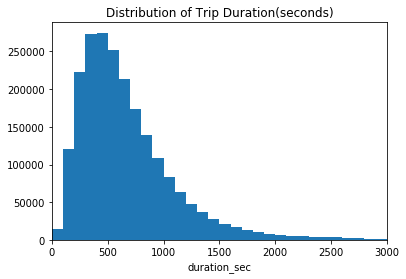

In [75]:
# Distribution of trip duration.  
bin = np.arange(0, df_clean['duration_sec'].max() + 100 , 100)
plt.hist(data = df_clean , x = 'duration_sec' , bins = bin)
plt.xlim(0,3000)
plt.title('Distribution of Trip Duration(seconds)')
plt.xlabel('duration_sec');


>It is right screwed with a long tail on the right. So I am adding log transformation to make the graph more readable.

>Measuring trip using seconds is not giving proper distribution. So I am change the duration to minuters.

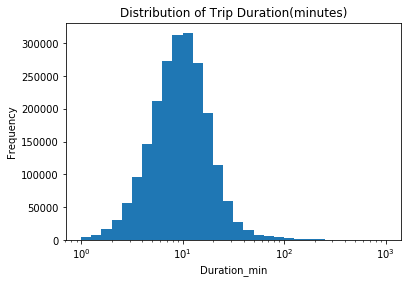

In [76]:
bin = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_clean , x = 'duration_min' , bins = bin);
plt.xticks(ticks,labels);
plt.xlabel('Duration_min');
plt.xscale('log');
plt.title('Distribution of Trip Duration(minutes)')
plt.ylabel('Frequency');

>From the plot, we can say that most people tend to use the bikes for short-time trips ( around 10 mins).

Question 2 : Whats the distrubition of bike rides as per user age group?

In [77]:
#Generate a new field for member age group from member_age_bin
df_clean['member_age_bin'] = df_clean['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

In [78]:
df_trip_by_age = df_clean.groupby('member_age_bin').agg({'bike_id':'count'})

In [79]:
df_trip_by_age['perc'] = (df_trip_by_age['bike_id']/df_trip_by_age['bike_id'].sum())*100

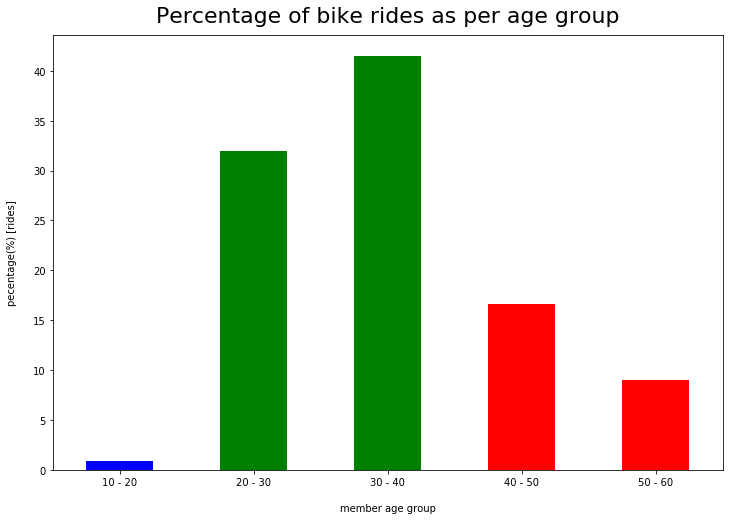

In [80]:
user_color = ['blue', 'green', 'green', 'red', 'red']
df_trip_by_age['perc'].plot(kind='bar', color=user_color, figsize=(12,8))
plt.title('Percentage of bike rides as per age group', fontsize=22, y=1.015)
plt.xlabel('member age group', labelpad=16)
plt.ylabel('pecentage(%) [rides]', labelpad=16)
plt.xticks(rotation=360);
#plt.savefig('image05.png');

>20 to 40 years old people took more than %70 of bike rides. Among those, 30 to 40 years old people's rides account almost %40 of all bike rides.

Question 3 : Whats the distrubition of bike rides as per gender?

In [81]:
df_trip_by_gender = df_clean.groupby('member_gender').agg({'bike_id':'count'})

In [82]:
df_trip_by_gender['perc'] = (df_trip_by_gender['bike_id']/df_trip_by_gender['bike_id'].sum())*100

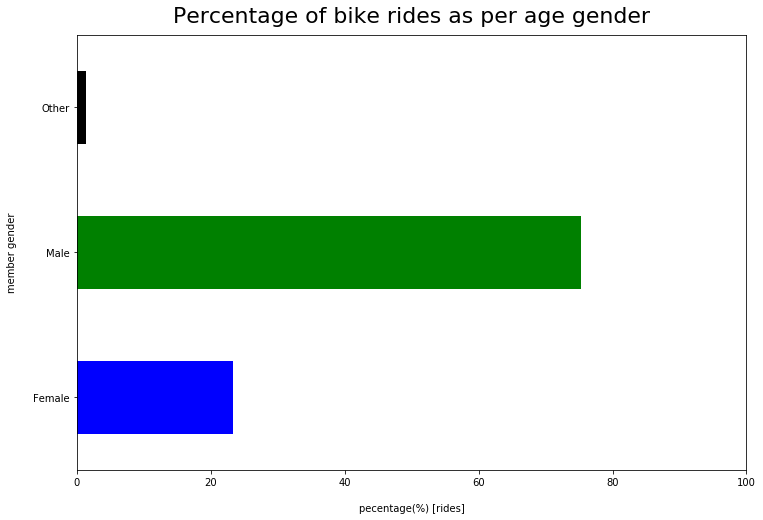

In [83]:
user_color = ['blue', 'green', 'black']
df_trip_by_gender['perc'].plot(kind='barh', color=user_color, figsize=(12,8))
plt.title('Percentage of bike rides as per age gender', fontsize=22, y=1.015)
plt.ylabel('member gender', labelpad=16)
plt.xlabel('pecentage(%) [rides]', labelpad=16)
plt.xticks(rotation=360)
plt.xlim(0,100);
#plt.savefig('image06.png');

>Male took more than %70 of all bike rides, while female took around %24 of them.

Question 4. Does month affect the trip duration ?

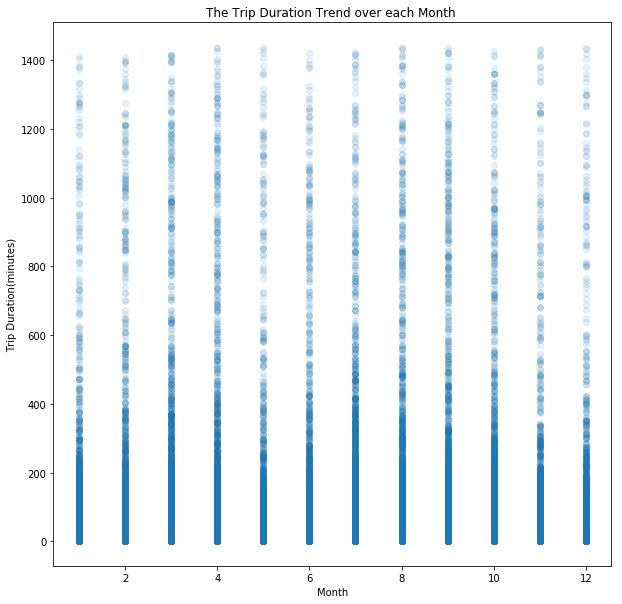

In [84]:
# Check the trip duration change over each month.
plt.figure(figsize = [10,10]) 
plt.scatter(data = df_clean , x = 'start_time_month' , y = 'duration_min' , alpha = 0.1 )
plt.title('The Trip Duration Trend over each Month ')
plt.xlabel('Month')
plt.ylabel('Trip Duration(minutes)');

June to August seems to have the highest trip duration.

Question 5. Will season show a more obvious affect on trip duration ?

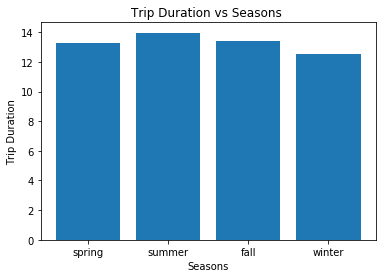

In [85]:
# Create the 4 season categories
spring_time = df_clean.query('start_time_month in ["3" , "4" , "5"]' ).duration_min.mean ()
summer_time = df_clean.query('start_time_month in ["6" , "7" , "8"] ').duration_min.mean()
fall_time = df_clean.query('start_time_month in ["9" , "10" , "11"] ').duration_min.mean()
winter_time = df_clean.query('start_time_month in ["12" , "1" , "2"]' ).duration_min.mean()
# month must be double quoteed characters to avoid syntax errors
plt.bar(['spring','summer','fall','winter'],[spring_time , summer_time , fall_time , winter_time] )
plt.title('Trip Duration vs Seasons ')
plt.xlabel('Seasons')
plt.ylabel('Trip Duration');

In [86]:
spring_time , summer_time , fall_time , winter_time

(13.273702121128583, 13.964223801696518, 13.37798616550543, 12.502315419757227)

>Summer has the longest trip duration , with average about 14 mins. 

>But there is no significant difference of trip duration in the four seasons. It may be because the weather in San Francisco bay area does not change much.

>The trip durations are shortest in winter maybe because of the cold weather. This dip is very small owing to the temperate climate of SF Bay area.

Question 6 : Is trip duration affected by user type?

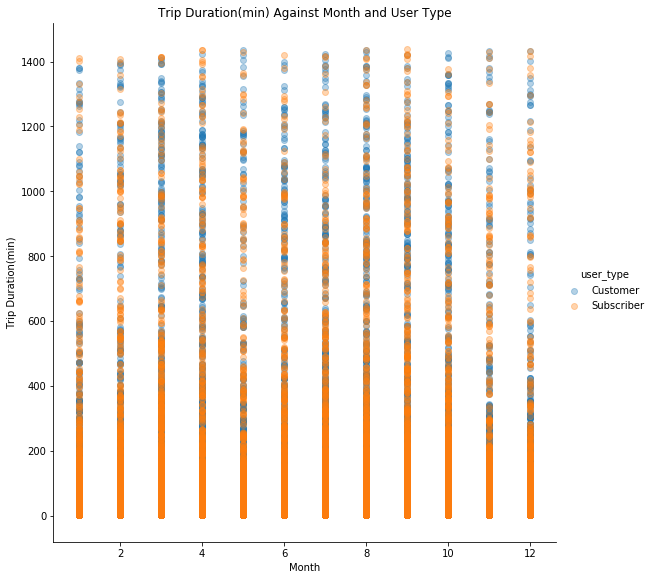

In [87]:
g = sb.FacetGrid(data =  df_clean, hue = 'user_type', size = 8)
g.map(plt.scatter, 'start_time_month','duration_min', alpha = 1/3)
g.add_legend()
plt.title('Trip Duration(min) Against Month and User Type')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

>Its pretty much evident that there are far more customers than subscribers.

>Although the number of subscribers are quite less but they tend to rent the bikes for long trips, almost everytime above 250 minutes.